In [1]:
#include <TMath.h>
#include <TGraph2D.h>
#include <TRandom.h>
#include <TStyle.h>
#include <TCanvas.h>
#include <TF2.h>
#include <TH1.h>
//TCanvas* graph2dfit()
//{
   gStyle->SetOptStat(0);
   gStyle->SetOptFit();
   TCanvas *c = new TCanvas("c","Graph2D example",0,0,600,800);
   c->Divide(2,3);
   Double_t rnd, x, y, z;
   Double_t e = 0.3;
   Int_t nd = 400;
   Int_t np = 10000;
   TRandom r;
   Double_t fl = 6;
   TF2  *f2 = new TF2("f2","1000*(([0]*sin(x)/x)*([1]*sin(y)/y))+200",
      -fl,fl,-fl,fl);
   f2->SetParameters(1,1);
   TGraph2D *dt = new TGraph2D();
   // Fill the 2D graph
   Double_t zmax = 0;
   for (Int_t N=0; N<nd; N++) {
      f2->GetRandom2(x,y);
      // Generate a random number in [-e,e]
      rnd = 2*r.Rndm()*e-e;
      z = f2->Eval(x,y)*(1+rnd);
      if (z>zmax) zmax = z;
      dt->SetPoint(N,x,y,z);
   }
   Double_t hr = 350;
   TH1D *h1 = new TH1D("h1",
   "#splitline{Difference between Original}{#splitline{function and Function}{with noise}}",
   100, -hr, hr);
   TH1D *h2 = new TH1D("h2",
   "#splitline{Difference between Original}{#splitline{function and Delaunay triangles}{interpolation}}",
   100, -hr, hr);
   TH1D *h3 = new TH1D("h3",
   "#splitline{Difference between Original}{function and Minuit fit}",
   500, -hr, hr);
   f2->SetParameters(0.5,1.5);
   dt->Fit(f2);
   TF2 *fit2 = (TF2*)dt->FindObject("f2");
   f2->SetParameters(1,1);
   for (Int_t N=0; N<np; N++) {
      f2->GetRandom2(x,y);
      // Generate a random number in [-e,e]
      rnd = 2*r.Rndm()*e-e;
      z = f2->Eval(x,y)*(1+rnd);
      h1->Fill(f2->Eval(x,y)-z);
      z = dt->Interpolate(x,y);
      h2->Fill(f2->Eval(x,y)-z);
      z = fit2->Eval(x,y);
      h3->Fill(f2->Eval(x,y)-z);
   }
   c->cd(1);
   f2->SetTitle("Original function with Graph2D points on top");
   f2->SetMaximum(zmax);
   gStyle->SetHistTopMargin(0);
   f2->Draw("surf1");
   dt->Draw("same p0");
   c->cd(3);
   dt->SetMargin(0.1);
   dt->SetFillColor(36);
   dt->SetTitle("Histogram produced with Delaunay interpolation");
   dt->Draw("surf4");
   c->cd(5);
   fit2->SetTitle("Minuit fit result on the Graph2D points");
   fit2->Draw("surf1");
   h1->SetFillColor(47);
   h2->SetFillColor(38);
   h3->SetFillColor(29);
   c->cd(2); h1->Fit("gaus","Q") ; h1->Draw();
   c->cd(4); h2->Fit("gaus","Q") ; h2->Draw();
   c->cd(6); h3->Fit("gaus","Q") ; h3->Draw();
   c->cd();
   return c;
//}


****************************************
Minimizer is Minuit / Migrad
Chi2                      =  4.25425e+06
NDf                       =          398
Edm                       =  1.32198e-12
NCalls                    =           55
p0                        =     0.574556   +/-   0.109982    
p1                        =      1.72367   +/-   0.329947    


Warning in <TF2::GetRandom2>: function:f2 has 24 negative values: abs assumed
Warning in <TF2::GetRandom2>: function:f2 has 24 negative values: abs assumed


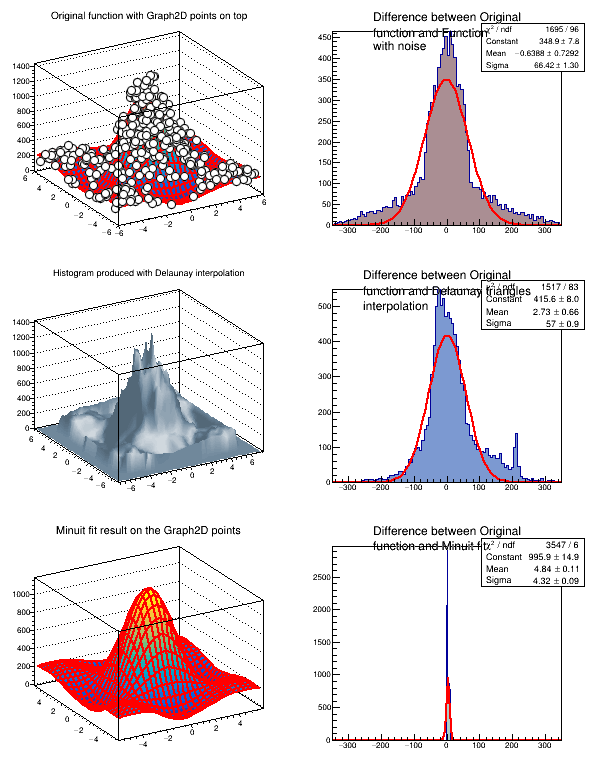

In [2]:
c->Draw()